In [1]:
import pandas as pd
import numpy as np

# Data Manipulation

In [2]:
df = pd.read_csv('/work/online_shoppers_intention.csv')

### Reading the Data

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
for i in df.columns:
    k=df[i].nunique()
    print(f'{i} : {k}')

Administrative : 27
Administrative_Duration : 3335
Informational : 17
Informational_Duration : 1258
ProductRelated : 311
ProductRelated_Duration : 9551
BounceRates : 1872
ExitRates : 4777
PageValues : 2704
SpecialDay : 6
Month : 10
OperatingSystems : 8
Browser : 13
Region : 9
TrafficType : 20
VisitorType : 3
Weekend : 2
Revenue : 2


In [7]:
Y=df['Revenue']
X=df.drop('Revenue',axis=1)

## Data preprocesing

Splitting the Numercal and categorical data for standardization and 1-hot encoding 

In [8]:
X_numerical = X.drop(['Month','VisitorType'],axis=1)

In [9]:
X_numerical.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend'],
      dtype='object')

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_numerical)
X_num_scaled.shape #zero mean unit variance standardization

(12330, 15)

In [11]:
X_num_sc=pd.DataFrame(X_num_scaled,columns=list(X_numerical.columns))

In [12]:
X_num_sc.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0.142857,0.083333,0.000,0.052632,0.0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.428571,0.000000,1.000,0.105263,0.0
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0.285714,0.083333,0.125,0.157895,0.0
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0.285714,0.166667,0.000,0.157895,1.0


In [13]:
X_scaled = pd.concat([X_num_sc,X[['Month','VisitorType']]],axis=1)

In [14]:
X_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month,VisitorType
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.0,Feb,Returning_Visitor
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0.142857,0.083333,0.000,0.052632,0.0,Feb,Returning_Visitor
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.428571,0.000000,1.000,0.105263,0.0,Feb,Returning_Visitor
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0.285714,0.083333,0.125,0.157895,0.0,Feb,Returning_Visitor
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0.285714,0.166667,0.000,0.157895,1.0,Feb,Returning_Visitor


In [15]:
X_scaled_enc=X_scaled #made another variable just to preserve the above one
for i in ('Month','VisitorType'):
    dummies = pd.get_dummies(X_scaled[i]) #1-hot encoding
    dummies.columns=str(i)+'_'+dummies.columns 
    X_scaled_enc = pd.concat([X_scaled_enc,dummies],axis=1)
    X_scaled_enc.drop(i,inplace=True,axis=1)
    


In [16]:
X_scaled_enc.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X_scaled_enc,Y,test_size=0.3,random_state=32)
X_train.shape,X_test.shape

((8631, 28), (3699, 28))

### Checking correlation for feature selection

In [18]:
X_train.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [19]:
X_corr = X_train[['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend']]

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

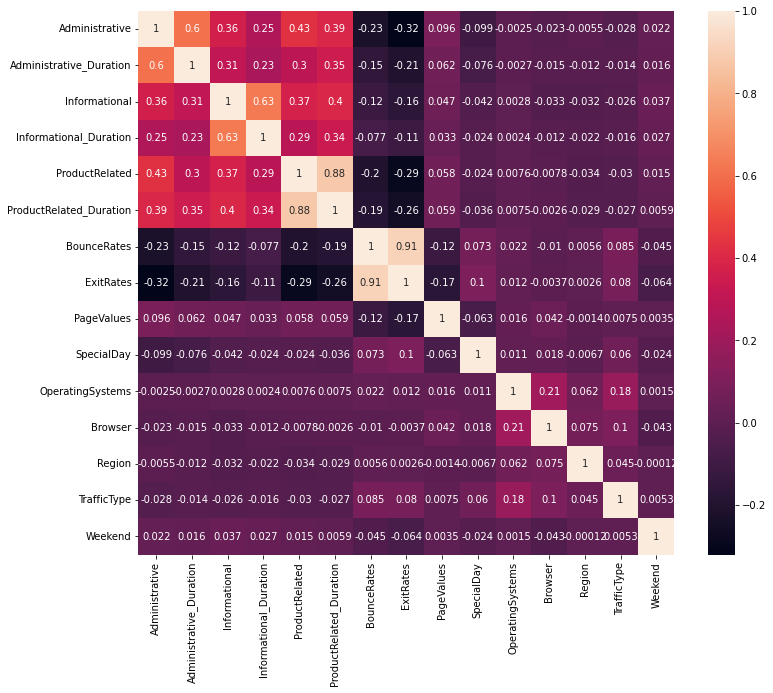

In [21]:
plt.figure(figsize=(12,10))
cor=X_corr.corr()
sns.heatmap(cor, annot=True)
plt.show()

### Feature Selection

In [22]:
#function to find columns correlated and to be removed
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [23]:
corr_feat = correlation(X_corr,0.85)
corr_feat

{'ExitRates', 'ProductRelated_Duration'}

In [24]:
corr_feat = list(corr_feat)
X_train.drop(corr_feat,inplace=True,axis=1)

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
X_test.drop(corr_feat,inplace=True,axis=1)

In [26]:
X_train.shape,X_test.shape

((8631, 26), (3699, 26))

In [27]:
y_train.shape,y_test.shape

((8631,), (3699,))

## KNN-Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
pred = knn.predict(X_test)

In [31]:
# confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[2977  135]
 [ 462  125]]
              precision    recall  f1-score   support

       False       0.87      0.96      0.91      3112
        True       0.48      0.21      0.30       587

    accuracy                           0.84      3699
   macro avg       0.67      0.58      0.60      3699
weighted avg       0.80      0.84      0.81      3699



In [32]:
#exploring best value for k
# error_rate = []
# for i in range(1,40):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train,y_train)
#     pred_i = knn.predict(X_test)
#     error_rate.append(np.mean(pred_i!=y_test))

In [33]:
# plt.figure(figsize=(10,6))
# plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
#          markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')

In [34]:
#so i should try with K val at 8
# knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[2977  135]
 [ 462  125]]
              precision    recall  f1-score   support

       False       0.87      0.96      0.91      3112
        True       0.48      0.21      0.30       587

    accuracy                           0.84      3699
   macro avg       0.67      0.58      0.60      3699
weighted avg       0.80      0.84      0.81      3699



We can clearly see f1-score for flase has increased but for true values has gone down

## SVM-Classifier

In [35]:
from sklearn.svm import SVC

In [36]:
SVMmodel = SVC()
SVMmodel.fit(X_train,y_train)
svmpredictions= SVMmodel.predict(X_test)


In [37]:
print(confusion_matrix(y_test,svmpredictions))
print('\n')
print(classification_report(y_test,svmpredictions))

[[3091   21]
 [ 473  114]]


              precision    recall  f1-score   support

       False       0.87      0.99      0.93      3112
        True       0.84      0.19      0.32       587

    accuracy                           0.87      3699
   macro avg       0.86      0.59      0.62      3699
weighted avg       0.86      0.87      0.83      3699



## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtpredictions = dtree.predict(X_test)

In [60]:
print(confusion_matrix(y_test,dtpredictions))
print(classification_report(y_test,dtpredictions))

[[2834  278]
 [ 240  347]]
              precision    recall  f1-score   support

       False       0.92      0.91      0.92      3112
        True       0.56      0.59      0.57       587

    accuracy                           0.86      3699
   macro avg       0.74      0.75      0.74      3699
weighted avg       0.86      0.86      0.86      3699



We can see some improvment here in the true values but not satisfying enough

## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [43]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[2998  114]
 [ 244  343]]
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      3112
        True       0.75      0.58      0.66       587

    accuracy                           0.90      3699
   macro avg       0.84      0.77      0.80      3699
weighted avg       0.90      0.90      0.90      3699



F-1 score for true has improved further bout not up to the mark

## ROC and AUC

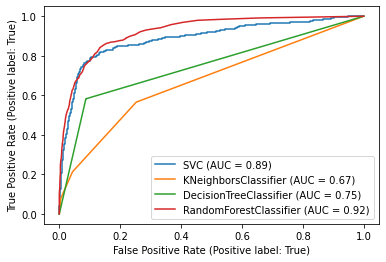

In [44]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
roc_SVM = plot_roc_curve(SVMmodel, X_test, y_test)
roc_knn = plot_roc_curve(knn, X_test, y_test, ax=roc_SVM.ax_)
roc_stree =plot_roc_curve(dtree, X_test, y_test,ax=roc_SVM.ax_)
roc_rfc =plot_roc_curve(rfc, X_test, y_test, ax=roc_SVM.ax_)

plt.show()

## OverSampling

In [45]:
!pip install imblearn

In [46]:
from imblearn.over_sampling import RandomOverSampler

In [47]:
from collections import Counter

In [48]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_t_over,y_t_over = oversample.fit_resample(X_train,y_train)
Counter(y_t_over)

Counter({False: 7310, True: 7310})

In [51]:
#KNN
knn_over = KNeighborsClassifier(n_neighbors=3)
knn_over.fit(X_t_over,y_t_over)
pred = knn_over.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))




[[2569  543]
 [ 311  276]]
              precision    recall  f1-score   support

       False       0.89      0.83      0.86      3112
        True       0.34      0.47      0.39       587

    accuracy                           0.77      3699
   macro avg       0.61      0.65      0.63      3699
weighted avg       0.80      0.77      0.78      3699



In [53]:
#SVM
SVMmodel_over = SVC()
SVMmodel_over.fit(X_t_over,y_t_over)
svmpredictions= SVMmodel_over.predict(X_test)

print(confusion_matrix(y_test,svmpredictions))
print('\n')
print(classification_report(y_test,svmpredictions))

[[2630  482]
 [ 169  418]]


              precision    recall  f1-score   support

       False       0.94      0.85      0.89      3112
        True       0.46      0.71      0.56       587

    accuracy                           0.82      3699
   macro avg       0.70      0.78      0.73      3699
weighted avg       0.86      0.82      0.84      3699



In [58]:
#DecisionTree
dtree_over = DecisionTreeClassifier()
dtree_over.fit(X_t_over,y_t_over)
dtpredictions = dtree_over.predict(X_test)
print(confusion_matrix(y_test,dtpredictions))
print(classification_report(y_test,dtpredictions))


[[2859  253]
 [ 260  327]]
              precision    recall  f1-score   support

       False       0.92      0.92      0.92      3112
        True       0.56      0.56      0.56       587

    accuracy                           0.86      3699
   macro avg       0.74      0.74      0.74      3699
weighted avg       0.86      0.86      0.86      3699



In [62]:
#randomForest
rfc_over = RandomForestClassifier(n_estimators=100)
rfc_over.fit(X_t_over, y_t_over)
rfc_pred = rfc_over.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[2921  191]
 [ 188  399]]
              precision    recall  f1-score   support

       False       0.94      0.94      0.94      3112
        True       0.68      0.68      0.68       587

    accuracy                           0.90      3699
   macro avg       0.81      0.81      0.81      3699
weighted avg       0.90      0.90      0.90      3699



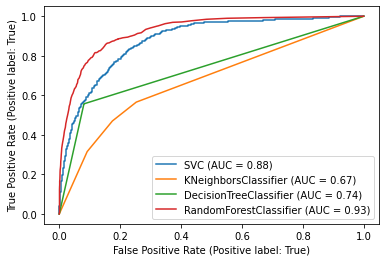

In [63]:
#ROC after OVersampling
roc_SVM = plot_roc_curve(SVMmodel_over, X_test, y_test)
roc_knn = plot_roc_curve(knn_over, X_test, y_test, ax=roc_SVM.ax_)
roc_stree =plot_roc_curve(dtree_over, X_test, y_test,ax=roc_SVM.ax_)
roc_rfc =plot_roc_curve(rfc_over, X_test, y_test, ax=roc_SVM.ax_)

## Undersampling

In [64]:
from imblearn.under_sampling import RandomUnderSampler

In [65]:
undersample = RandomUnderSampler(random_state=42, sampling_strategy='not minority')
X_t_under,y_t_under = undersample.fit_resample(X_train,y_train)
Counter(y_t_under)

Counter({False: 1321, True: 1321})

In [66]:
#KNN
knn_under = KNeighborsClassifier(n_neighbors=3)
knn_under.fit(X_t_under,y_t_under)
pred = knn_under.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))




[[2059 1053]
 [ 214  373]]
              precision    recall  f1-score   support

       False       0.91      0.66      0.76      3112
        True       0.26      0.64      0.37       587

    accuracy                           0.66      3699
   macro avg       0.58      0.65      0.57      3699
weighted avg       0.80      0.66      0.70      3699



In [68]:
#SVM
SVMmodel_under = SVC()
SVMmodel_under.fit(X_t_under,y_t_under)
svmpredictions= SVMmodel_under.predict(X_test)

print(confusion_matrix(y_test,svmpredictions))
print('\n')
print(classification_report(y_test,svmpredictions))

[[2246  866]
 [ 177  410]]


              precision    recall  f1-score   support

       False       0.93      0.72      0.81      3112
        True       0.32      0.70      0.44       587

    accuracy                           0.72      3699
   macro avg       0.62      0.71      0.63      3699
weighted avg       0.83      0.72      0.75      3699



In [70]:
#DecisionTree
dtree_under = DecisionTreeClassifier()
dtree_under.fit(X_t_under,y_t_under)
dtpredictions = dtree_under.predict(X_test)
print(confusion_matrix(y_test,dtpredictions))
print(classification_report(y_test,dtpredictions))


[[2504  608]
 [ 127  460]]
              precision    recall  f1-score   support

       False       0.95      0.80      0.87      3112
        True       0.43      0.78      0.56       587

    accuracy                           0.80      3699
   macro avg       0.69      0.79      0.71      3699
weighted avg       0.87      0.80      0.82      3699



In [72]:
#randomForest
rfc_under = RandomForestClassifier(n_estimators=100)
rfc_under.fit(X_t_under, y_t_under)
rfc_pred = rfc_under.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[2625  487]
 [  81  506]]
              precision    recall  f1-score   support

       False       0.97      0.84      0.90      3112
        True       0.51      0.86      0.64       587

    accuracy                           0.85      3699
   macro avg       0.74      0.85      0.77      3699
weighted avg       0.90      0.85      0.86      3699



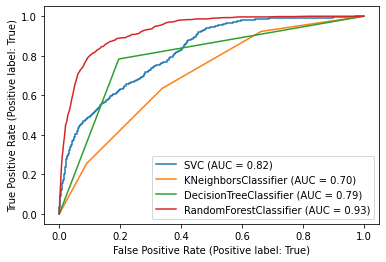

In [73]:
#ROC after undersampling
roc_SVM = plot_roc_curve(SVMmodel_under, X_test, y_test)
roc_knn = plot_roc_curve(knn_under, X_test, y_test, ax=roc_SVM.ax_)
roc_stree =plot_roc_curve(dtree_under, X_test, y_test,ax=roc_SVM.ax_)
roc_rfc =plot_roc_curve(rfc_under, X_test, y_test, ax=roc_SVM.ax_)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f6b64ae9-38ba-4e6f-91cb-44163f0a046c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>